# <span style='color:#FE774C'>Marine Regions </span> Example Notebook

In [158]:
import odp
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')

In [149]:
db=odp.Database()
db_plt= odp.PlotTools()

#### Check which datasets are availabe - pick the dataset of your choice
#### Here we will explore 'World Seas IHO'

In [3]:
db.datasets

,schema,table
name,,
World Ocean Database Casts,raw_wod,casts_temp
World Ocean Database Measurements,raw_wod,observations_temp
OBIS Biodiversity,raw_obis,occurrences
World Marine Heritage Sites,raw_marineregions,worldmarineheritagesites
World Seas IHO,raw_marineregions,world_seas_iho_v3
EEZ Land Union,raw_marineregions,eez_land_union_v3_202003
Intersect EEZ IHO,raw_marineregions,intersect_eez_iho_v4_2020
World EEZ,raw_marineregions,world_eez_v11_20191118
World Registry of Marine Species,raw_worms,taxa


## Pulling data - <span style='color:#FE774C'> **Marine regions** data  </span>


#### Insert the name of the table you are interested in into the query function

In [6]:
df_eez = db.query('Intersect EEZ IHO', limit=40)
df_eez.head(3)

/srv/conda/envs/notebook/lib/python3.8/site-packages/odp-0.0.1-py3.8.egg/odp/odp_sdk_experimental.py:175: UserWarning: Results reached row limit. Increase limit if needed


,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,...,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,1.0,25614,Albanian part of the Adriatic Sea,3314,Adriatic Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,12127,19.11030,40.93096,"POLYGON ((19.98580 39.74337, 19.95859 39.74320..."
1,2.0,25622,Albanian part of the Ionian Sea,3351,Ionian Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,39,19.97118,39.69394,"POLYGON ((20.00835 39.69182, 20.00810 39.69187..."
2,3.0,25603,Algerian part of the Alboran Sea,3324,Alboran Sea,8378,Algerian Exclusive Economic Zone,2152,Algeria,DZA,...,None,0,0,None,None,0,7045,-1.74716,35.58150,"POLYGON ((-1.18826 35.57788, -1.18973 35.57580..."
3,4.0,25180,Algerian part of the Mediterranean Sea - Weste...,4279,Mediterranean Sea - Western Basin,8378,Algerian Exclusive Economic Zone,2152,Algeria,DZA,...,None,0,0,None,None,0,124148,3.83338,37.29350,"POLYGON ((7.81205 38.00998, 7.81355 38.00945, ..."
4,5.0,25647,American Samoa part of the South Pacific Ocean,1910,South Pacific Ocean,8444,American Samoa Exclusive Economic Zone,8670,American Samoa,ASM,...,None,0,0,None,None,0,405830,-169.06347,-13.85484,"POLYGON ((-168.48917 -11.04444, -168.46611 -11..."


#### We can also add filters to our query

In [11]:
filter1 = db.filter_data('SOVEREIGN1', '=', 'Norway')
df_norway = db.query('Intersect EEZ IHO', filters=[filter1])
df_norway.head(3)

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,...,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,258.0,25236,Jan Mayen part of the Greenland Sea,2356,Greenland Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,...,None,0,0,None,None,0,121220,-7.56373,72.18359,"POLYGON ((-8.08625 71.14481, -8.11043 71.14313..."
1,259.0,25241,Jan Mayen part of the Norwegian Sea,2353,Norwegian Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,...,None,0,0,None,None,0,171687,-3.46641,70.28880,"POLYGON ((2.35622 71.17424, 2.35184 71.15638, ..."
2,289.0,49666,Joint regime area Sweden - Norway part of the ...,2379,Skagerrak,48977,Joint regime area Sweden / Norway,2252,Norway,NOR,...,None,0,0,None,None,0,140,10.50095,58.80998,"POLYGON ((10.59444 58.76147, 10.26814 58.77569..."
3,362.0,25246,Norwegian part of the Barentsz Sea,4247,Barentsz Sea,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,164067,28.60795,72.69014,"POLYGON ((33.70659 73.98140, 33.74218 73.97512..."
4,363.0,25233,Norwegian part of the North Sea,2350,North Sea,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,119489,4.05390,58.58220,"POLYGON ((4.73328 61.00000, 4.79661 61.00000, ..."


### Let's play around more with the World Seas IHO table

In [133]:
df_mr = db.query('World Seas IHO', limit=40)
df_mr.head()

,NAME,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry
0,Rio de La Plata,33,-56.842478,-35.113338,-59.765656,-36.358856,-54.943024,-31.523437,31797,4325,"POLYGON ((-54.94302 -34.94791, -54.97875 -34.9..."
1,Bass Strait,62A,146.424291,-39.450520,143.532508,-41.440274,149.909468,-37.460793,112699,4366,"POLYGON ((149.90464 -37.54325, 149.90500 -37.5..."
2,Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8..."
3,Tasman Sea,63,160.710798,-39.701056,146.872615,-50.866916,175.286985,-30.000000,3344624,4365,"POLYGON ((159.03333 -30.00000, 159.03983 -30.0..."
4,Mozambique Channel,45A,40.877244,-19.304095,32.430623,-26.842402,49.241982,-10.498872,1394283,4261,"POLYGON ((43.38218 -11.37021, 43.42691 -11.374..."


## Plotting polygons - <span style='color:#FE774C'> **Marine regions** data  </span>

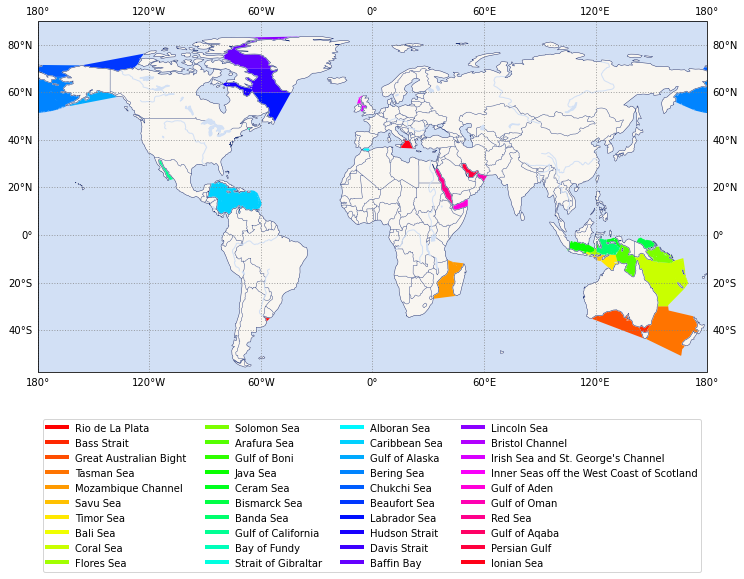

In [136]:
db_plt.plot_polygons(df_mr, col='NAME')

## Using a <span style='color:#FE774C'> **polygon** </span> to pull data from  <span style='color:#FE774C'> **other datasets** </span>

First, determine your polygon. Here we are using the polygon determined by the the Red Sea in our Marine Regions dataset

In [139]:
df_mr.set_index("NAME", inplace=True)
poly = df_mr.loc['Caribbean Sea']['geometry']


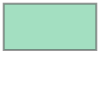

In [146]:
poly.envelope

Then pass in the polygon along with the dataset and table you are interested in within a timeframe - here we pick the WOD observations table

In [154]:
df_poly = db.query('World Ocean Database Casts','2015-01-01','2016-01-01',poly.envelope, limit=100)
df_poly.head()

,cast_id,timestamp,geometry,year,dataset_id,changeset_id,subcategory,instrument_id,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
0,17030942,2015-03-02 23:04:30.004,POINT (-66.94984 20.32447),2015,None,None,None,None,UNITED STATES,3134,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US037011,OKEANOS EXPLORER (R/V;c.s.WTDH;b.1988;comm-d 0...,US DOC NOAA OFFICE OF OCEAN.AND ATM.RESEARCH;O...,None,1176
1,17030969,2015-03-16 15:22:44.002,POINT (-66.19365 18.52830),2015,None,None,None,None,UNITED STATES,3834,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US037012,OKEANOS EXPLORER (R/V;c.s.WTDH;b.1988;comm-d 0...,US DOC NOAA OFFICE OF OCEAN.AND ATM.RESEARCH;O...,None,772
2,17030968,2015-03-10 23:57:07.001,POINT (-64.27938 17.74331),2015,None,None,None,None,UNITED STATES,3664,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US037011,OKEANOS EXPLORER (R/V;c.s.WTDH;b.1988;comm-d 0...,US DOC NOAA OFFICE OF OCEAN.AND ATM.RESEARCH;O...,None,1176
3,17030955,2015-03-07 16:35:50.997,POINT (-64.78608 17.44969),2015,None,None,None,None,UNITED STATES,3492,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US037011,OKEANOS EXPLORER (R/V;c.s.WTDH;b.1988;comm-d 0...,US DOC NOAA OFFICE OF OCEAN.AND ATM.RESEARCH;O...,None,1176
4,16678789,2015-03-25 10:04:41.159,POINT (-79.46700 18.29000),2015,None,None,None,None,UNITED STATES,38412,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US035428,None,None,U.S. ARGO PROJECT,47


#### Plot the casts using the plot functions

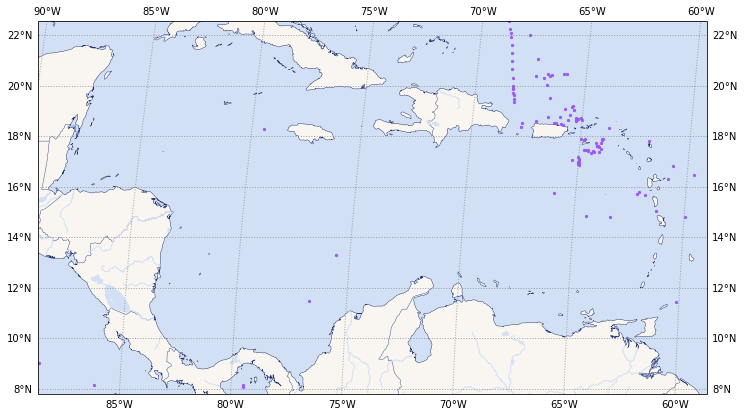

In [155]:
db_plt.plot_points(df_poly)

#### We can also create an interactive plot (will show only when cell is run)

In [144]:
db.plot(df_poly)

{"initialViewState": {"latitude": 0, "longitude": 0, "zoom": 1}, "layers": [{"@@type": "PointCloudLayer", "autoHighlight": true, "data": [{"alkalinity": null, "alkalinity_flag": null, "cast_id": 16698375, "chlorophyll": null, "chlorophyll_flag": null, "geometry": {"coordinates": [-68.06019592285156, 16.07333755493164, 0.4402632713317871], "type": "Point"}, "latitude": 16.07333755493164, "longitude": -68.06019592285156, "measurement_id": 71718974521344000, "nitrate": null, "nitrate_flag": null, "oxygen": null, "oxygen_flag": null, "ph": null, "ph_flag": null, "phosphate": null, "phosphate_flag": null, "pressure": 0.442874908447266, "pressure_flag": null, "salinity": null, "salinity_flag": -127, "silicate": null, "silicate_flag": null, "temperature": 27.3077449798584, "temperature_flag": 0, "time": "2015-02-18 17:12:23", "timestamp": {}, "year": 2015, "z": 0.440263271331787, "z_flag": 0}, {"alkalinity": null, "alkalinity_flag": null, "cast_id": 16698375, "chlorophyll": null, "chlorophyll_flag": null, "geometry": {"coordinates": [-68.06019592285156, 16.07333755493164, 1.5909467935562134], "type": "Point"}, "latitude": 16.07333755493164, "longitude": -68.06019592285156, "measurement_id": 71718974521344001, "nitrate": null, "nitrate_flag": null, "oxygen": null, "oxygen_flag": null, "ph": null, "ph_flag": null, "phosphate": null, "phosphate_flag": null, "pressure": 1.60038888454437, "pressure_flag": null, "salinity": null, "salinity_flag": -127, "silicate": null, "silicate_flag": null, "temperature": 27.3017349243164, "temperature_flag": 0, "time": "2015-02-18 17:12:23", "timestamp": {}, "year": 2015, "z": 1.59094679355621, "z_flag": 0}, {"alkalinity": null, "alkalinity_flag": null, "cast_id": 16698375, "chlorophyll": null, "chlorophyll_flag": null, "geometry": {"coordinates": [-68.06019592285156, 16.07333755493164, 2.9317352771759033], "type": "Point"}, "latitude": 16.07333755493164, "longitude": -68.06019592285156, "measurement_id": 71718974521344002, "nitrate": null, "nitrate_flag": null, "oxygen": null, "oxygen_flag": null, "ph": null, "ph_flag": null, "phosphate": null, "phosphate_flag": null, "pressure": 2.94914436340332, "pressure_flag": null, "salinity": 35.9277153015137, "salinity_flag": 0, "silicate": null, "silicate_flag": null, "temperature": 27.2941074371338, "temperature_flag": 0, "time": "2015-02-18 17:12:23", "timestamp": {}, "year": 2015, "z": 2.9317352771759, "z_flag": 0}, {"alkalinity": null, "alkalinity_flag": null, "cast_id": 16698375, "chlorophyll": null, "chlorophyll_flag": null, "geometry": {"coordinates": [-68.06019592285156, 16.07333755493164, 4.062393665313721], "type": "Point"}, "latitude": 16.07333755493164, "longitude": -68.06019592285156, "measurement_id": 71718974521344003, "nitrate": null, "nitrate_flag": null, "oxygen": null, "oxygen_flag": null, "ph": null, "ph_flag": null, "phosphate": null, "phosphate_flag": null, "pressure": 4.08652782440186, "pressure_flag": null, "salinity": 35.9336013793945, "salinity_flag": 0, "silicate": null, "silicate_flag": null, "temperature": 27.2897205352783, "temperature_flag": 0, "time": "2015-02-18 17:12:23", "timestamp": {}, "year": 2015, "z": 4.06239366531372, "z_flag": 0}, {"alkalinity": null, "alkalinity_flag": null, "cast_id": 16698375, "chlorophyll": null, "chlorophyll_flag": null, "geometry": {"coordinates": [-68.06019592285156, 16.07333755493164, 5.5932745933532715], "type": "Point"}, "latitude": 16.07333755493164, "longitude": -68.06019592285156, "measurement_id": 71718974521344004, "nitrate": null, "nitrate_flag": null, "oxygen": null, "oxygen_flag": null, "ph": null, "ph_flag": null, "phosphate": null, "phosphate_flag": null, "pressure": 5.62652444839478, "pressure_flag": null, "salinity": 35.9318542480469, "salinity_flag": 0, "silicate": null, "silicate_flag": null, "temperature": 27.2973918914795, "temperature_flag": 0, "time": "2015-02-18 17:12:23", "timestamp": {}, "year": 2015, "z": 5.59327459335327, "z_flag": 0}, {"alkalinity": null, "alkalinity_fl

## Using <span style='color:#200A3A'> GEOPANDAS </span> to combine datasets - <span style='color:#FE774C'> **Marine regions** </span> and <span style='color:#FE774C'> **WOD Casts** </span>

#### First pull cast data using query function by passing in name of WOD table and date range

In [156]:
df_casts = db.query('World Ocean Database Casts','2015-01-01','2016-01-01', limit=1000)
df_casts.head(3)

,cast_id,timestamp,geometry,year,dataset_id,changeset_id,subcategory,instrument_id,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
0,16642974,2015-01-01,POINT (8.51472 42.40516),2015,None,None,None,None,ITALY,11,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,IT001835,None,None,None,77
1,16632612,2015-01-01,POINT (80.41000 -11.94000),2015,None,None,None,None,UNKNOWN,92,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,99010047,FIXED PLATFORM,None,RESEARCH MOORED ARRAY FOR AFRIC.-ASIAN-AUSTRAL...,11
2,16632608,2015-01-01,POINT (66.84000 -1.62000),2015,None,None,None,None,UNKNOWN,91,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,99011008,FIXED PLATFORM,None,RESEARCH MOORED ARRAY FOR AFRIC.-ASIAN-AUSTRAL...,12


#### Then use a geopandas function to join the two tables. 
#### You can select how and the operation

In [159]:
df_mr_casts = gpd.sjoin(df_mr, df_casts, how='inner', op='intersects')
df_mr_casts.head(3)

,ID,Longitude,Latitude,min_X,min_Y,max_X,max_Y,area,MRGID,geometry,...,subcategory,instrument_id,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
NAME,,,,,,,,,,,,,,,,,,,,,
Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",...,None,None,AUSTRALIA,25,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,AU005887,None,None,ARGO AUSTRALIA,996
Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",...,None,None,UNITED STATES,389,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,US029676,None,None,U.S. ARGO PROJECT,30
Great Australian Bight,62,132.716558,-36.725916,117.614198,-43.566016,146.231156,-31.463669,1326209,4276,"POLYGON ((143.53251 -38.85535, 143.54856 -38.8...",...,None,None,AUSTRALIA,457,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,AU005827,None,None,ARGO AUSTRALIA,997
